# Shor算法

Shor算法是一种量子计算算法，由美国数学家彼得·肖尔（Peter Shor）在1994年提出。这个算法能够高效地分解大整数，是量子计算领域的重要突破之一。在经典计算机上，大整数的分解被认为是一个非常困难的问题，特别是当涉及到用作现代加密技术基础的大质数时。Shor算法的提出表明，一旦量子计算机足够强大，它能够破解包括RSA加密在内的多种基于大整数分解难题的加密系统。

在本章中，我们将重点关注Shor算法的量子部分，它实际上解决了寻找周期（period finding）的问题。由于分解问题可以在多项式时间内转化为寻找周期问题，因此一个有效的寻找周期算法也可以用来有效地分解整数。由于寻找周期本身就是一个值得研究的问题，我们将首先解决这个问题，然后再讨论如何用它来进行分解。

## 1. 问题：寻找周期

让我们看一下这个周期函数：

$$ f(x) = a^x \bmod{N}$$

模运算（缩写为"mod"）意味着求一个数除以另一个数的余数。例如:

$$ 17 \bmod 5 = 2 $$

因为 $17 \div 5 = 3$ 余 $2$ （即 $17 = (3\times 5) + 2$ ）。在Python中，模运算用 $\%$ 符号表示。

这种行为在模运算中使用，其中数字在达到某个值（模数）后会"回绕"。使用模运算，我们可以写：

$$ 17 = 2 \pmod 5$$

注意，这里 $\pmod 5$ 适用于整个等式（因为它在括号中），而上面的等式中它只适用于等式的左边。

其中 $a$ 和 $N$ 是正整数， $a$ 小于 $N$ ，并且它们没有公共因子。周期或阶（ $r$ ）是最小的（非零）整数，使得：

$$a^r \bmod N = 1 $$ 

## 2. 解决方案

Shor的解决方案是在幺正算符上使用量子相位估计：

$$ U|y\rangle \equiv |ay \bmod N \rangle $$

为了看出这怎么有帮助，让我们来计算U的一个本征态可能是什么样子。如果我们从态 $|1\rangle$ 开始，我们可以看到U的每次成功应用都会将我们寄存器的状态乘以 $a \pmod N$ ，经过 $r$ 次应用后，我们将再次到达态 $|1\rangle$ 。例如， $a=3$ 和 $N=35$ 时：

$$\begin{aligned}
U|1\rangle &= |3\rangle & \\
U^2|1\rangle &= |9\rangle \\
U^3|1\rangle &= |27\rangle \\
& \vdots \\
U^{(r-1)}|1\rangle &= |12\rangle \\
U^r|1\rangle &= |1\rangle 
\end{aligned}$$

所以这个循环中态的叠加（ $|u_0\rangle$ ）将是 $U$ 的一个本征态：

$$|u_0\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{|a^k \bmod N\rangle} $$


$$\begin{aligned}
|u_0\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + |3\rangle + |9\rangle \dots + |4\rangle + |12\rangle) \\[10pt]
U|u_0\rangle &= \tfrac{1}{\sqrt{12}}(U|1\rangle + U|3\rangle + U|9\rangle \dots + U|4\rangle + U|12\rangle) \\[10pt]
 &= \tfrac{1}{\sqrt{12}}(|3\rangle + |9\rangle + |27\rangle \dots + |12\rangle + |1\rangle) \\[10pt]
 &= |u_0\rangle
\end{aligned}$$
</details>


这个本征态的本征值为1，这并不很有趣。一个更有趣的本征态可能是其中每个计算基态的相位都不同的。具体来说，让我们看看第 $k$ 个态的相位与 $k$ 成正比的情况：

$$\begin{aligned}
|u_1\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i k}{r}}|a^k \bmod N\rangle}\\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{r}}|u_1\rangle 
\end{aligned}
$$

$$\begin{aligned}
|u_1\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + e^{-\tfrac{2\pi i}{12}}|3\rangle + e^{-\tfrac{4\pi i}{12}}|9\rangle \dots + e^{-\tfrac{20\pi i}{12}}|4\rangle + e^{-\tfrac{22\pi i}{12}}|12\rangle) \\[10pt]
U|u_1\rangle &= \tfrac{1}{\sqrt{12}}(|3\rangle + e^{-\tfrac{2\pi i}{12}}|9\rangle + e^{-\tfrac{4\pi i}{12}}|27\rangle \dots + e^{-\tfrac{20\pi i}{12}}|12\rangle + e^{-\tfrac{22\pi i}{12}}|1\rangle) \\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{12}}\cdot\tfrac{1}{\sqrt{12}}(e^{\tfrac{-2\pi i}{12}}|3\rangle + e^{-\tfrac{4\pi i}{12}}|9\rangle + e^{-\tfrac{6\pi i}{12}}|27\rangle \dots + e^{-\tfrac{22\pi i}{12}}|12\rangle + e^{-\tfrac{24\pi i}{12}}|1\rangle) \\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{12}}|u_1\rangle
\end{aligned}$$

（我们可以看到$r = 12$出现在相位的分母中。） 

这是一个特别有趣的本征值，因为它包含了 $r$ 。事实上， $r$ 必须包括在内，以确保 $r$ 个计算基态之间的相位差是相等的。这不是唯一具有这种行为的本征态；为了进一步推广，我们可以乘以一个整数 $s$ 来得到这个相位差，它将出现在我们的本征值中：

$$\begin{aligned}
|u_s\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i s k}{r}}|a^k \bmod N\rangle}\\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{r}}|u_s\rangle 
\end{aligned}
$$

$$\begin{aligned}
|u_s\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + e^{-\tfrac{2\pi i s}{12}}|3\rangle + e^{-\tfrac{4\pi i s}{12}}|9\rangle \dots + e^{-\tfrac{20\pi i s}{12}}|4\rangle + e^{-\tfrac{22\pi i s}{12}}|12\rangle) \\[10pt]
U|u_s\rangle &= \tfrac{1}{\sqrt{12}}(|3\rangle + e^{-\tfrac{2\pi i s}{12}}|9\rangle + e^{-\tfrac{4\pi i s}{12}}|27\rangle \dots + e^{-\tfrac{20\pi i s}{12}}|12\rangle + e^{-\tfrac{22\pi i s}{12}}|1\rangle) \\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{12}}\cdot\tfrac{1}{\sqrt{12}}(e^{-\tfrac{2\pi i s}{12}}|3\rangle + e^{-\tfrac{4\pi i s}{12}}|9\rangle + e^{-\tfrac{6\pi i s}{12}}|27\rangle \dots + e^{-\tfrac{22\pi i s}{12}}|12\rangle + e^{-\tfrac{24\pi i s}{12}}|1\rangle) \\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{12}}|u_s\rangle
\end{aligned}$$

现在对于每个整数值 $s$ ，其中 $0 \leq s \leq r-1$ ，我们都有一个独特的本征态。非常方便的是，如果我们把所有这些本征态加起来，不同的相位会抵消掉除 $|1\rangle$ 之外的所有计算基态：

$$ \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle = |1\rangle$$

为此，我们来看一个 $a = 7$ 和 $N=15$ 的较小例子。在这种情况下， $r=4$ ：

$$\begin{aligned}
\tfrac{1}{2}(\quad|u_0\rangle &= \tfrac{1}{2}(|1\rangle \hphantom{e^{-\tfrac{2\pi i}{12}}}+ |7\rangle \hphantom{e^{-\tfrac{12\pi i}{12}}} + |4\rangle \hphantom{e^{-\tfrac{12\pi i}{12}}} + |13\rangle)\dots \\[10pt]
+ |u_1\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{2\pi i}{4}}|7\rangle + e^{-\tfrac{\hphantom{1}4\pi i}{4}}|4\rangle + e^{-\tfrac{\hphantom{1}6\pi i}{4}}|13\rangle)\dots \\[10pt]
+ |u_2\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{4\pi i}{4}}|7\rangle + e^{-\tfrac{\hphantom{1}8\pi i}{4}}|4\rangle + e^{-\tfrac{12\pi i}{4}}|13\rangle)\dots \\[10pt]
+ |u_3\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{6\pi i}{4}}|7\rangle + e^{-\tfrac{12\pi i}{4}}|4\rangle + e^{-\tfrac{18\pi i}{4}}|13\rangle)\quad) = |1\rangle \\[10pt]
\end{aligned}$$

由于计算基态 $|1\rangle$ 是这些本征态的叠加，这意味着如果我们在 $U$ 上使用态 $|1\rangle$ 做QPE，我们将测量一个相位：

$$\phi = \frac{s}{r}$$

其中 $s$ 是 $0$ 到 $r-1$ 之间的随机整数。我们最终使用连分数算法对 $\phi$ 进行处理以找到 $r$ 。

接下来，我们将使用 DeepQuantum 来演示Shor算法。在这个演示中，我们将提供 $U$ 的线路而不作解释，但在第4节中，我们将讨论如何有效地构建 $U^{2^j}$ 的电路。

## 3. DeepQuantum 实现

在这个例子中，我们将解决 $a=7$ 和 $N=15$ 时的周期查找问题。我们提供了 $U$ 的线路，其中：

$$U|y\rangle = |ay\bmod 15\rangle $$

在这里不做具体解释。为了创建 $U^x$，我们只需重复该线路 $x$ 次即可。在下一节中，我们将讨论一种创建这些线路的通用高效方法。函数 `c_amod15` 返回 `a` 的受控 U 门，重复 `power` 次。

In [1]:
from typing import Any, List, Optional, Union
import torch 
import deepquantum as dq
import numpy as np

class c_amod15(dq.Ansatz):
    def __init__(
        self,
        nqubit: int,
        a: int,
        power: int,
        minmax: Optional[List[int]] = None,
        controls: Union[int, List[int], None]=None,
        reverse: bool = False,
        init_state: Any = 'zeros',
        den_mat: bool = False,
        mps: bool = False,
        chi: Optional[int] = None,
        show_barrier: bool = False
    ) -> None:
        super().__init__(nqubit=nqubit,wires=None, minmax=minmax, ancilla=None, controls=controls,
                         init_state=init_state, name='c_amod15', den_mat=den_mat,
                         mps=mps, chi=chi)


        if a not in [2,4,7,8,11,13]:
            raise ValueError("'a' must be 2,4,7,8,11 or 13")

        for _ in range(power):
            if a in [2, 13]:
                self.swap([self.wires[2],self.wires[3]], controls)
                self.swap([self.wires[1],self.wires[2]], controls)
                self.swap([self.wires[0],self.wires[1]], controls)
            if a in [7, 8]:
                self.swap([self.wires[0],self.wires[1]], controls)
                self.swap([self.wires[1],self.wires[2]], controls)
                self.swap([self.wires[2],self.wires[3]], controls)
            if a in [4, 11]:
                self.swap([self.wires[1],self.wires[3]], controls)
                self.swap([self.wires[0],self.wires[2]], controls)
            if a in [7, 11, 13]:
                for q in range(4):
                    self.x(self.wires[q], controls)



c:\Users\HP\.conda\envs\dq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


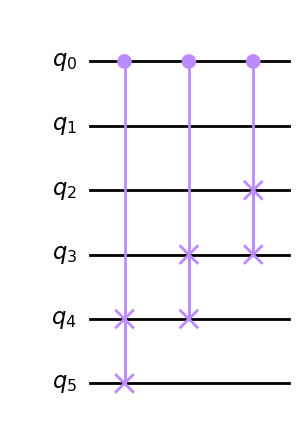

In [2]:
cir=c_amod15(nqubit=6,a=2,power=1,minmax=[2, 5],controls=0)
cir.draw() 

我们将使用 8 个计数量子位:

In [3]:
n_count = 8  
a = 2

我们还导入了 QFT 线路：

In [4]:
class QuantumFourierTransform(dq.Ansatz):
    def __init__(
        self,
        nqubit: int,
        minmax: Optional[List[int]] = None,
        reverse: bool = False,
        init_state: Any = 'zeros',
        den_mat: bool = False,
        mps: bool = False,
        chi: Optional[int] = None,
        show_barrier: bool = False
    ) -> None:
        super().__init__(nqubit=nqubit, wires=None, minmax=minmax, ancilla=None, controls=None,
                         init_state=init_state, name='QuantumFourierTransform', den_mat=den_mat,
                         mps=mps, chi=chi)
        self.reverse = reverse
        for i in self.wires:
            self.qft_block(i)
            if show_barrier:
                self.barrier(self.wires)
        if not reverse:
            for i in range(len(self.wires) // 2):
                self.swap([self.wires[i], self.wires[-1 - i]])

    def qft_block(self, n):
        self.h(n)
        k = 2
        for i in range(n, self.minmax[1]):
            self.cp(i + 1, n, torch.pi / 2 ** (k - 1))
            k += 1

有了这些构建模块，我们就可以轻松地构建 Shor 算法的线路：

In [5]:
cir = dq.QubitCircuit(12)

for q in range(n_count):
    cir.h(q)

cir.x(n_count)

for q in range(n_count):
    cir.add(c_amod15(nqubit=12,a=a, power=2**q, minmax=[8, 11],controls=q))

cir.add(QuantumFourierTransform(nqubit=12, minmax=[0, 7],reverse=True).inverse())

cir.measure(wires=list(range(n_count)))
cir.draw()

让我们看看测量得到的结果：

{'10000000': 246, '11000000': 239, '01000000': 275, '00000000': 264}


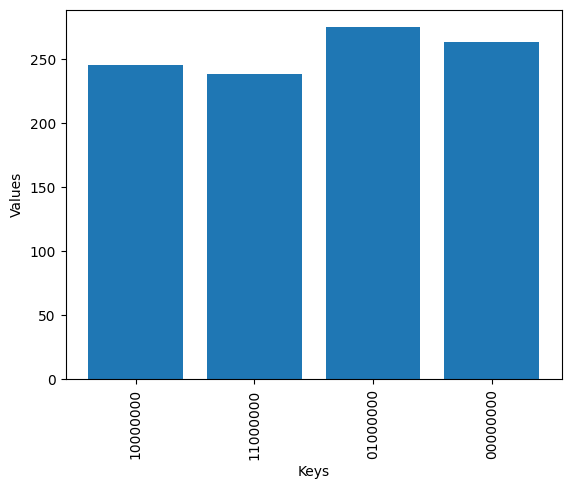

In [6]:
cir()
res=cir.measure(wires=list(range(n_count)))
print(res)


import matplotlib.pyplot as plt

# 准备x轴和y轴的数据
keys = list(res.keys())
values = list(res.values())
counts = res
# 创建条形图
plt.bar(keys, values)

# 设置图表的标题和轴标签
plt.xlabel('Keys')
plt.ylabel('Values')

# 设置x轴的刻度标签，以便它们更容易阅读
plt.xticks(rotation=90)

# 显示图表
plt.show()

由于我们有 8 个量子位，这些结果对应的测量相位为：

In [7]:
import pandas as pd

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # 将二进制字符串转换为十进制
    phase = decimal / (2**n_count)  # 计算对应的本征值
    measured_phases.append(phase)
    # 将这些值添加到我们表格的行中：
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# 在表格中打印行
headers=["输出", "相位"]
df = pd.DataFrame(rows, columns=headers)
print(df)

                         输出              相位
0  10000000(bin) = 128(dec)  128/256 = 0.50
1  11000000(bin) = 192(dec)  192/256 = 0.75
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  00000000(bin) =   0(dec)    0/256 = 0.00


我们现在可以使用连分数算法来尝试找到 $s$ 和 $r$ 。Python 内置了此功能：我们可以使用 `fractions` 模块将浮点数转换为 `Fraction` 对象，我们可以使用 `.limit_denominator()` 方法获得最接近我们浮点数的分数。

In [8]:
from fractions import Fraction

# 获取最接近0.666的分数，分母小于15
approx_fraction = Fraction(0.666).limit_denominator(15)
print(approx_fraction)

2/3


r 必须小于 N，因此我们将最大分母设置为 `15`：

In [9]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# 以表格形式打印
headers=["相位", "分数", "猜测的r值"]
df = pd.DataFrame(rows, columns=headers)
print(df)

     相位   分数  猜测的r值
0  0.50  1/2      2
1  0.75  3/4      4
2  0.25  1/4      4
3  0.00  0/1      1


我们可以看到，两个测量特征值为我们提供了正确的结果： $r=4$，而且我们可以看到 Shor 算法有失败的可能性。这些不好的结果是因为 $s = 0$，或者 $s$ 和 $r$ 不是互质的，我们得到了 $r$ 的一个因子而不是 $r$ 本身。解决这个问题最简单的方法就是重复实验，直到我们得到一个令人满意的 $r$ 结果。

## 4. 模幂运算

您可能已经注意到，通过重复 $U$ 来创建 $U^{2^j}$ 门的方法随 $j$ 呈指数增长，并且不会产生多项式时间算法。我们希望有一种方法来创建算子：

$$ U^{2^j}|y\rangle = |a^{2^j}y \bmod N \rangle $$

它随 $j$ 多项式增长。幸运的是，高效计算：

$$ a^{2^j} \bmod N$$

是可能的。经典计算机可以使用称为重复平方的算法来计算指数。在我们的例子中，由于我们只处理形式为 $2^j$ 的指数，因此重复平方算法变得非常简单：

In [10]:
def a2jmodN(a, j, N):
    """ a^{2^j} (mod N) """
    for i in range(j):
        a = np.mod(a**2, N)
    return a
a2jmodN(7, 2049, 53)

47

如果可以在 Python 中实现高效算法，那么我们就可以在量子计算机上使用相同的算法。不幸的是，尽管模幂运算电路关于 $j$ 呈多项式增长，但它们并不简单，而且是 Shor 算法的瓶颈。

## 5. 从周期查找到因式分解

并非所有因式分解问题都很困难；我们可以立即发现偶数，并知道它的一个因子是 2。事实上，有特定的标准来选择难以因式分解的数字，但基本思想是选择两个大质数的乘积。 

通用的因式分解算法首先会检查是否有因式分解整数的捷径（数是偶数吗？数的形式是否为 $N = a^b$?），然后在最坏情况下使用 Shor 的周期查找算法。由于我们的目标是关注算法的量子部分，因此我们将直接跳到 N 是两个质数乘积的情况。

### 示例：分解 15

为了在少量量子位上看到因式分解的示例，我们将分解 15，我们都知道它是两个不太大的质数 3 和 5 的乘积。

In [11]:
N = 15

第一步是在 $1$ 和 $N-1$ 之间选择一个随机数 $a$ ：

In [12]:
a=2

接下来我们快速检查它是否已经是 $N$ 的非平凡因子：

In [13]:
from math import gcd 
gcd(a, N)

1

接下来，我们对 `a = 2` 和 `N = 15` 执行 Shor 的阶查找算法。请记住，我们测量的相位将是 $s/r$，其中:

$$ a^r \bmod N = 1 $$

并且 $s$ 是 0 到 $r-1$ 之间的随机整数。

In [14]:
print(df)

     相位   分数  猜测的r值
0  0.50  1/2      2
1  0.75  3/4      4
2  0.25  1/4      4
3  0.00  0/1      1


我们可以很容易地找到 $r$ 的猜测值为4：  

现在我们有了 $r$，我们可能可以用它来找到 $N$ 的一个因子。因为：

$$a^r \bmod N = 1 $$

那么：

$$(a^r - 1) \bmod N = 0 $$

这意味着 $N$ 必须整除 $a^r-1$。而且如果 $r$ 也是偶数，那么我们可以写：

$$a^r -1 = (a^{r/2}-1)(a^{r/2}+1)$$

（如果 $r$ 不是偶数，我们就无法进一步了，必须使用不同的 $a$ 值重试）。那么 $N$ 和 $a^{r/2}-1$ 或 $a^{r/2}+1$ 的最大公约数很可能是 $N$ 的一个真因子 [2]：

In [15]:
r=4
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 5]


## 6. 参考文献

[1] Beauregard S. Circuit for Shor's algorithm using 2n+ 3 qubits[J]. arXiv preprint quant-ph/0205095, 2002.

[2] Nielsen M A, Chuang I L. Cambridge Series on Information and the Natural Sciences[J]. Quantum Computation and Quantum Information, 2000